# Ptychographic Wavefront Camera Simulation

Created in July, 2024

Created by Ni Chen (https://ni-chen.github.io/)

In [3]:
import os
import sys
import torch
from PIL import Image

print('Work on local machine')
work_folder = os.path.dirname(os.path.abspath("__file__"))

print("torch.cuda.is_available() = ", torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

os.chdir(work_folder)

sys.path.append(f'../')

%load_ext autoreload
%autoreload 2

Work on local machine
torch.cuda.is_available() =  False
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Example of imaging with 3x3 layout PWC

Check simulation parameters passed!


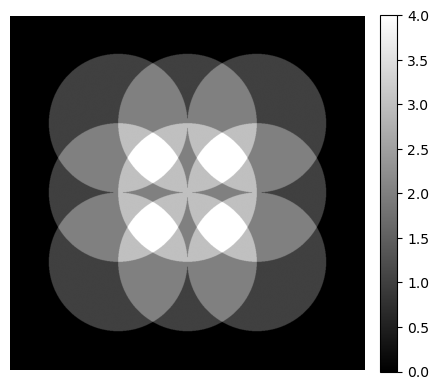

GS-GD method: GS iteration number is 2000; GD iteration is 1000


100%|██████████| 2000/2000 [37:51<00:00,  1.14s/it]


After GS, Ang MSE is 36.241221483796835; Amp MSE is 36.24076687172055.


100%|██████████| 1000/1000 [20:17<00:00,  1.22s/it]


In [6]:
%reload_ext autoreload
from FP import *
from util import *

N_hr = 512
data_dir = '../data/'

# Load the amplitude image
image = Image.open(f'{data_dir}usaf.jpg').convert('L')
image = transforms.Resize((N_hr, N_hr))(image)
image = transforms.ToTensor()(image).squeeze()
im = image / torch.max(image)

# Generate a ground truth with random phase
x_gt = torch.exp(im) * torch.exp(1j*(2*torch.pi*(2*(torch.rand([N_hr, N_hr])-0.5))))

# Construct a PWC
fp = FourierPtychography(N_hr=N_hr, N_lr=400, aperture_num=3, aperture_shape='circ', is_band_limit=True, device=device)
fp.sampling(overlapping_ratio=0.5)
fp.show_sampling()

# Generate the measurement
fp.fp_forward(x_gt)

# Reconstruction
x_est = fp.fp_gs_gd(max_it_gs=2000, max_it_gd=1000)

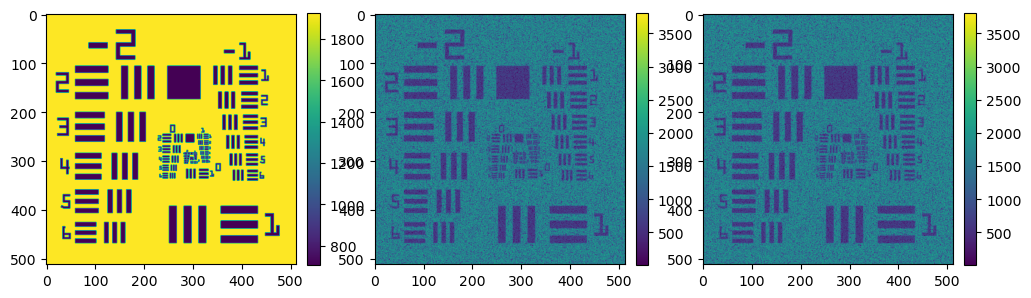

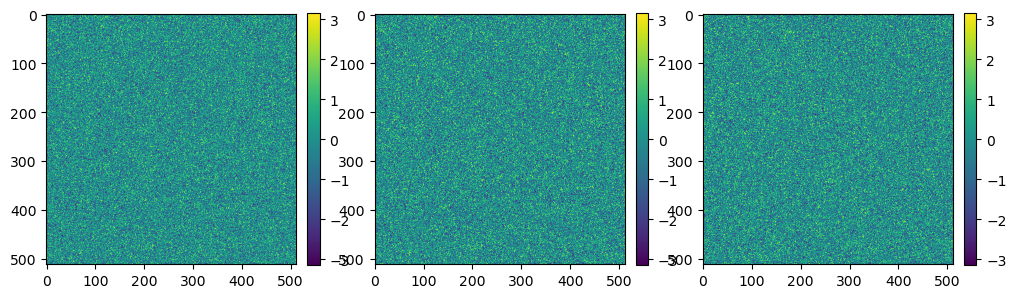

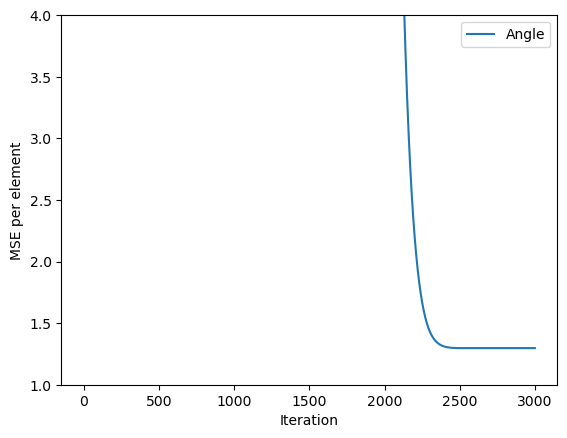

In [8]:
# Display the results
# imshow_list([fp.im_meas[4].cpu().numpy(), fp.im_meas[0].cpu().numpy()])
imshow_list([fp.x.abs().cpu(), fp.x_band.abs().cpu(), x_est.abs()])
imshow_list([fp.x.angle().cpu(), fp.x_band.angle().cpu(), x_est.angle()])

plt.plot(fp.ang_mse_hist, label='Angle')
plt.ylabel('MSE per element')
plt.xlabel('Iteration')
plt.legend()
plt.ylim(1, 4)
plt.show()

In [ ]:
N_hr = 256
gt = torch.randn([N_hr, N_hr]) + 1j*torch.randn([N_hr, N_hr])


Check simulation parameters passed!
GS-GD method: GS iteration number is 500; GD iteration is 500


100%|██████████| 500/500 [02:33<00:00,  3.25it/s]


After GS, Ang MSE is 9.32278765575029; Amp MSE is 9.322718823095784.


100%|██████████| 500/500 [03:53<00:00,  2.15it/s]


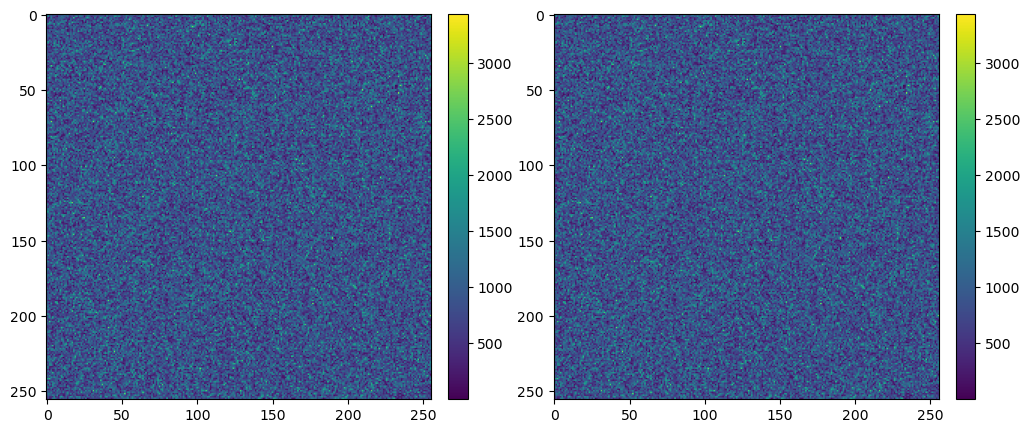

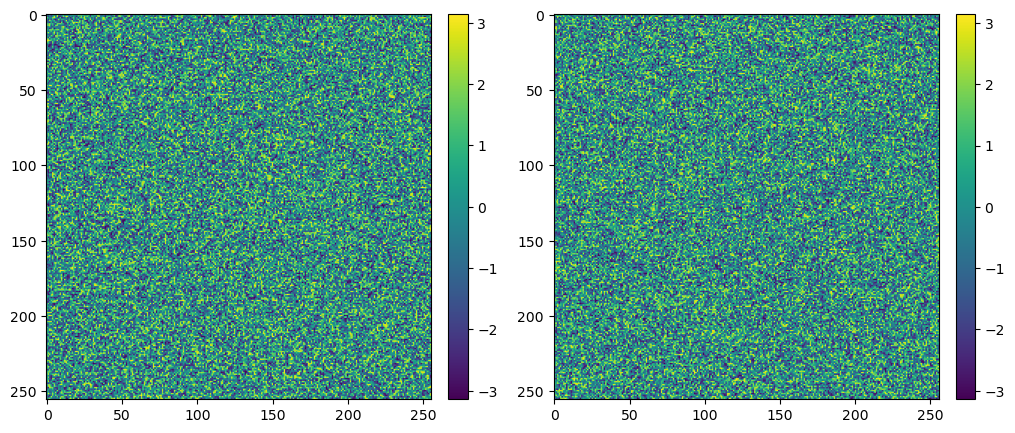

Ang MSE is: 1.2778392992913723


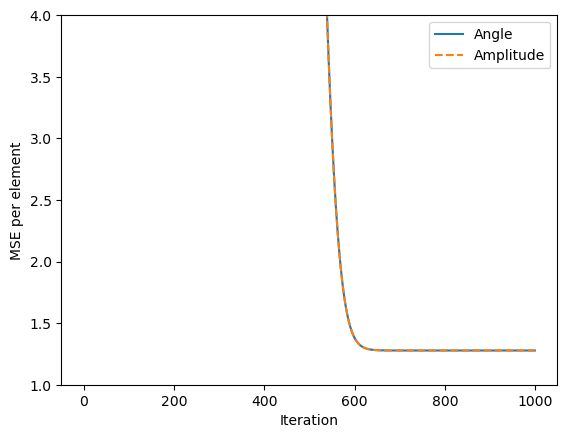

In [31]:
%reload_ext autoreload

from FP import *


fp = FourierPtychography(N_hr=N_hr, N_lr=200, is_energy_constraint=True, device=device)

fp.sampling(overlapping_ratio=0.5)

# fp.show_sampling()

fp.fp_forward(gt)

x_est = fp.fp_gs_gd(max_it_gs=500, max_it_gd=500, lr=0.5)

# print("PSNR:", 10*np.log10(1/mse_loss(x_est, fp.x.cpu())))
# print(f'Ang MSE is: {minAngMSE(x_est, fp.x.cpu())}')

imshow_list([fp.x.abs().cpu(), x_est.abs()])
imshow_list([fp.x.angle().cpu(), x_est.angle()])


print(f'Ang MSE is: {minAngMSE(x_est, fp.x.cpu())}')

# plt.plot(fp.mse_hist[0:999])
plt.plot(fp.ang_mse_hist, label='Angle')
plt.plot(fp.amp_mse_hist, '--', label='Amplitude')
plt.ylabel('MSE per element')
plt.xlabel('Iteration')
plt.legend()
plt.ylim(1, 4)
plt.show()

